In [3]:
import numpy as np
import pandas as pd 
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [4]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt 

In [5]:
data = fetch_california_housing()

In [6]:
X = pd.DataFrame(data.data, columns = data.feature_names)

In [7]:
y = pd.Series(data.target)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.3, random_state = 42)

In [9]:
numeric_features = X.columns.tolist()

In [10]:
numeric_transformer = Pipeline(steps = [
    ("scaler", StandardScaler())
])

In [11]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features)
    ])

In [12]:
pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("regressor", LinearRegression())
])

In [13]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (14448, 8)
y_train shape: (14448,)


In [14]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['MedInc', 'HouseAge',
                                                   'AveRooms', 'AveBedrms',
                                                   'Population', 'AveOccup',
                                                   'Latitude',
                                                   'Longitude'])])),
                ('regressor', LinearRegression())])

In [15]:
y_pred = pipeline.predict(X_test)

In [16]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [17]:
r2 = r2_score(y_test, y_pred)

In [18]:
print(rmse)

0.7284008391515452


In [19]:
print(r2)

0.5957702326061665


In [20]:
coeffs = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': pipeline.named_steps['regressor'].coef_
})
print(coeffs.sort_values(by='Coefficient', ascending=False))

      Feature  Coefficient
0      MedInc     0.849222
3   AveBedrms     0.348410
1    HouseAge     0.122119
4  Population    -0.000884
5    AveOccup    -0.041698
2    AveRooms    -0.299558
7   Longitude    -0.868617
6    Latitude    -0.893856


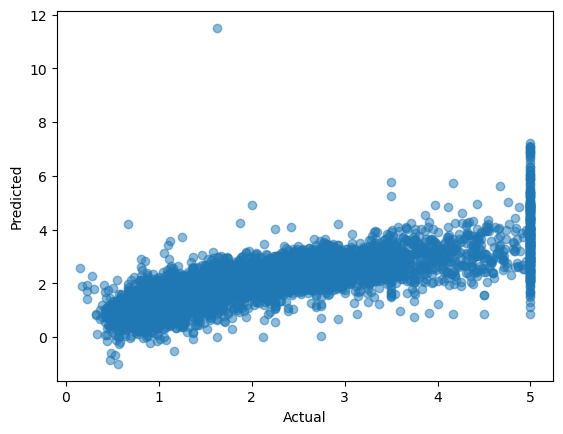

In [21]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [22]:
new_data = {
    'MedInc': [8.3252],
    'HouseAge': [41.0],
    'AveRooms': [6.9841],
    'AveBedrms': [1.0238],
    'Population': [322.0],
    'AveOccup': [2.5556],
    'Latitude': [37.88],
    'Longitude': [-122.23]
}


In [23]:
new_df = pd.DataFrame(new_data)

In [24]:
predicted_price = pipeline.predict(new_df)

In [26]:
print(f"Predicted Price : ${predicted_price[0]}")

Predicted Price : $4.1433301445427695
